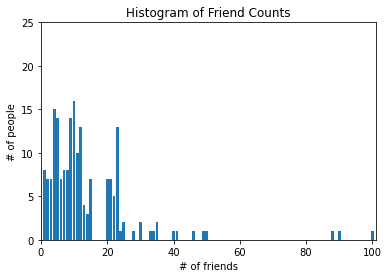

In [34]:
from collections import Counter
import matplotlib.pyplot as plt
from typing import List
from importnb import Notebook
lalgebra = Notebook.load("4 linear_algebra.ipynb")

# when you have a large dataset, it needs statistics to communicate relevant features of your data
num_friends = [100, 49, 41, 40, 25, 20, 10, 14, 30, 35, 1, 5, 10, 90, 88, 46, 34, 25, 24, 33, 50, 14, 12, 11, 23, 4, 12, 11, 21, 9, 9, 6, 7, 5, 4, 3, 2, 1, 10, 11, 15, 13, 9,
23, 4, 12, 11, 23, 5, 8, 10, 20, 22, 21, 9, 9, 6, 7, 5, 4, 3, 2, 1, 10, 11, 15, 23, 12, 13, 15, 8, 6, 23, 4, 12, 11, 23, 5, 8, 10, 20, 22, 21, 9, 9, 7, 5, 4, 3, 2, 1, 10, 8,
6, 7, 5, 4, 3, 2, 13, 12, 4, 5, 10, 21, 20, 28, 12, 4, 10, 12, 15, 6,23, 4, 12, 11, 23, 5, 8, 10, 20, 22, 21,  9, 9,  7, 5, 4, 3, 2, 1, 10, 10, 14, 30, 35, 1, 9, 12, 15, 7,
23, 4, 12, 11, 23, 5, 8, 10, 20, 22, 21, 9, 9, 6, 7, 5, 4, 3, 2, 1, 10, 11, 15, 23, 12, 13, 15, 8, 6, 23, 4, 12, 11, 23, 5, 8, 10, 20, 22, 21, 9, 9, 7, 5, 4, 3, 2, 1, 10]
friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [35]:
num_points = len(num_friends)               # 191
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 90

In [36]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 13.5340

13.534031413612565

In [37]:
# we create a simple median function that consider odd and even length.
# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2
print(median(num_friends))

10


In [38]:
# the quantile represents the value under which a certain percentile of the data lies
# (the median represents the value under which 50% of the data lies)
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 3
assert quantile(num_friends, 0.25) == 5
assert quantile(num_friends, 0.75) == 20
assert quantile(num_friends, 0.90) == 23
assert quantile(num_friends, 0.50) == median(num_friends)

In [39]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]
assert set(mode(num_friends)) == {10}

In [40]:
# another stat we can use to describe and understand the data, is dispersion
# it can be measured in different ways, one of the simpliest is the range between max and min values
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

# a better measure of dispersion is the variance
Vector = List[float]

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return lalgebra.sum_of_squares(deviations) / (n - 1)

assert 160 < variance(num_friends) < 200

In [41]:
import math
def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 13.6 < standard_deviation(num_friends) < 13.8

# a more robust alternative
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 15

In [43]:
# are the minutes spent in the company related to the number of friends in the company?
# to investigate the relation between two metrics
from numpy.random import default_rng
daily_minutes = default_rng(1).integers(low=200, high=600, size = 191)
daily_hours = [(lambda x: x*60)(x) for x in daily_minutes] # or easily [x*60 for x in daily_minutes]
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return lalgebra.dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 11.78 < covariance(num_friends, daily_minutes) < 11.92
assert 11.78 < covariance(num_friends, daily_hours)/60 < 11.92

# since it is not easy to estimate how "large" or "small" the covariance is, it better to use correlation
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

assert 0.007 < correlation(num_friends, daily_minutes) < 0.008 #weak positive correlation
assert 0.007 < correlation(num_friends, daily_hours) < 0.008
# correlation is unit-less, it lies between -1(weak) and 1(strong)
# keep in mind: correlation is very sensitive to outliers. double-check the dataset to make sure you dont have outliers justified to be excluded

In [ ]:
'''
For Further Exploration
SciPy, pandas, and StatsModels all come with a wide variety of statistical functions.

Statistics is important. (Or maybe statistics are important?) If you want to be a better data scientist, it would be a good idea to read a statistics textbook. Many are freely available online, including:

Introductory Statistics, by Douglas Shafer and Zhiyi Zhang (Saylor Foundation)

OnlineStatBook, by David Lane (Rice University)

Introductory Statistics, by OpenStax (OpenStax College)
'''